In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Markdown, display


# Question 1

In [3]:
airpol_df = pd.read_csv('airpol.csv')
print(airpol_df)

    Wind  Solar Rad  CO  NO  NO2  O3  HC
0      8         98   7   2   12   8   2
1      7        107   4   3    9   5   3
2      7        103   4   3    5   6   3
3     10         88   5   2    8  15   4
4      6         91   4   2    8  10   3
5      8         90   5   2   12  12   4
6      9         84   7   4   12  15   5
7      5         72   6   4   21  14   4
8      7         82   5   1   11  11   3
9      8         64   5   2   13   9   4
10     6         71   5   4   10   3   3
11     6         91   4   2   12   7   3
12     7         72   7   4   18  10   3
13    10         70   4   2   11   7   3
14    10         72   4   1    8  10   3
15     9         77   4   1    9  10   3
16     8         76   4   1    7   7   3
17     8         71   5   3   16   4   4
18     9         67   4   2   13   2   3
19     9         69   3   3    9   5   3
20    10         62   5   3   14   4   4
21     9         88   4   2    7   6   3
22     8         80   4   2   13  11   4
23     5        

In [4]:
# Determine continuous vs. non-continuous variables
# Select numeric columns
numeric_cols = airpol_df.select_dtypes(include=[np.number]).columns.tolist()

# Define a threshold for “continuous” (e.g. more than 10 distinct values)
threshold = 10
continuous_vars = [col for col in numeric_cols 
                   if airpol_df[col].nunique() > threshold]

# Everything else is treated as non-continuous
non_continuous_vars = [col for col in airpol_df.columns 
                       if col not in continuous_vars]

print("Continuous variables:", continuous_vars)
print("Non-continuous variables:", non_continuous_vars)

Continuous variables: ['Solar Rad', 'NO2', 'O3']
Non-continuous variables: ['Wind', 'CO', 'NO', 'HC']


(Used AI to generate the markdown formula below)

### Covariance and variance formula 

# Sample Covariance and Variance Formulas

**Sample Covariance between X and Y:**

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

**Sample Variance of X:**

$$
\text{Var}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$

In [17]:
# extract the two variables
wind = airpol_df['Wind']
solar_rad = airpol_df['Solar Rad']

# calculate the means
mean_wind = wind.mean()
mean_solar = solar_rad.mean()

# compute the covariance numerator by summing over the product of deviations
numerator = ((wind - mean_wind) * (solar_rad - mean_solar)).sum()

# for sample covariance, divide by (n - 1)
n = len(wind)
covariance = numerator / (n - 1)

print("Covariance:", covariance)

# Compute sample variances using first principles
var_wind = ((wind - mean_wind) ** 2).sum() / (n - 1)
var_solar = ((solar_rad - mean_solar) ** 2).sum() / (n - 1)

print("variance for wind:", var_wind)
print("variance for solar rad:", var_solar)

cov_var_matrix = np.array([[var_wind, covariance],
               [covariance, var_solar]])
print("Covariance-Variance Matrix:")
print(cov_var_matrix)

# now get the correlation between the 2 variables using first principles
std_wind = np.sqrt(var_wind) # standard deviation of wind
std_solar = np.sqrt(var_solar) # standard deviation of solar rad         
correlation = covariance / (std_wind * std_solar)
print("Correlation:", correlation)


#compute the correlation matrix 
correlation_matrix = np.array([[1, correlation],
                               [correlation, 1]])

print("Correlation Matrix:")
print(correlation_matrix)


Covariance: -2.7804878048780486
variance for wind: 2.5
variance for solar rad: 300.51567944250877
Covariance-Variance Matrix:
[[  2.5         -2.7804878 ]
 [ -2.7804878  300.51567944]]
Correlation: -0.10144191102756318
Correlation Matrix:
[[ 1.         -0.10144191]
 [-0.10144191  1.        ]]


I am lead to believe that in this question we are more interested in the relationship between the variables and we are expressing this relationship in terms of vectors, hence we will employ the use of the correlation.

We start by centering the variables:

$$
x = \text{wind} - \text{mean\_wind} \quad \text{and} \quad y = \text{solar\_rad} - \text{mean\_solar}
$$

The dot product of the centered variables gives the covariance (up to the normalization factor):

$$
\text{covariance} = \frac{x^T y}{n-1}
$$

Thus, the correlation can be written as:

$$
\text{correlation} = \frac{x^T y}{(n-1)\,\text{std\_wind}\,\text{std\_solar}}
$$

Alternatively, if we form the matrix \( A \) with the centered variables as columns,

$$
A = \begin{bmatrix} x & y \end{bmatrix},
$$

then the covariance matrix is

$$
\text{Cov} = \frac{A^T A}{n-1},
$$

and the off-diagonal element of $\text{Cov}$ is exactly $\frac{x^T y}{n-1}$. Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_wind}\,\text{std\_solar}}.
$$

## Using Correlation to Find the Angle Between Vectors

In our analysis, remember that the correlation between the centered variables (wind and solar radiation) is defined as the cosine of the angle between their corresponding vectors:

$$
\cos(\theta) = \text{correlation}
$$

This means if we know the correlation value, we can recover the angle between the two vectors by computing the arccosine. For example, in Python using NumPy, you can compute the angle (in radians) as:

$$
\theta = \arccos(\text{correlation})
$$

To convert this angle to degrees, use:

$$
\theta_{degrees} = \theta \times \frac{180}{\pi}
$$

Thus, the correlation not only tells us about the strength of the linear relationship but also directly informs us of the geometric angle between the centered variable vectors.

(explanation from AI on why we use the notation of Cov(0,1))


The notation **[0,1]** in the covariance matrix is used to refer to the position of the element representing the covariance between the two variables. In a 2x2 covariance matrix, the indices are zero-based, meaning:

- **0** represents the first variable (e.g., wind).
- **1** represents the second variable (e.g., solar radiation).

Thus, **Cov[0,1]** is the element in the first row and second column of the matrix, which holds the covariance between these two variables. This convention is common in programming and mathematical notation when dealing with arrays or matrices.

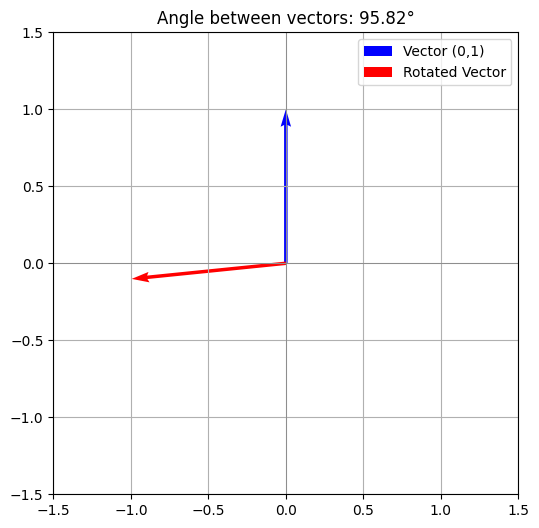

Correlation: -0.10144191102756318
Angle (radians): 1.6724130291225974
Angle (degrees): 95.82220817141446


In [19]:
# Plotting an arbitrary vector and its rotated counterpart using correlation-derived angle
import numpy as np
import matplotlib.pyplot as plt

# Use existing correlation if defined; otherwise, use an arbitrary value
try:
    corr = correlation
except NameError:
    corr = 0.5  # default arbitrary correlation value

# Calculate angle (in radians) from the correlation (assuming correlation = cos(theta))
theta = np.arccos(corr)
theta_deg = np.degrees(theta)

# Define the arbitrary vector (0,1)
vec1 = np.array([0, 1])

# Compute the rotated vector by applying a rotation matrix to vec1
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta),  np.cos(theta)]])
vec2 = rotation_matrix.dot(vec1)

# Plot the vectors starting from the origin
plt.figure(figsize=(6,6))
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector (0,1)')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated Vector')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.legend()
plt.title(f'Angle between vectors: {theta_deg:.2f}°')
plt.grid(True)
plt.show()

print('Correlation:', corr)
print('Angle (radians):', theta)
print('Angle (degrees):', theta_deg)

## Insight Questions

When analyzing data, centering the variables (i.e., subtracting the mean) lets us focus on the essential relationship between them. Consider two centered variables, \( x \) and \( y \). Their covariance is given by

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} x_i\,y_i = \frac{x^T y}{n-1}.
$$

We can summarize the variances and covariance in matrix form as follows:

$$
\mathbf{Cov} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\\\
\text{Cov}(x, y) & \text{Var}(y)
\end{bmatrix},
$$

where the variances are defined by

$$
\text{Var}(x) = \frac{\sum_{i=1}^{n} x_i^2}{n-1} \quad \text{and} \quad \text{Var}(y) = \frac{\sum_{i=1}^{n} y_i^2}{n-1}.
$$

The correlation between \( x \) and \( y \) is obtained by normalizing the covariance with the corresponding standard deviations:

$$
\text{Correlation} = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y},
$$

which is equivalent to expressing the correlation as the cosine of the angle between the vectors:

$$
\cos(\theta) = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y}.
$$

Thus, if the covariance is zero

$$
\text{Cov}(x, y) = 0,
$$

then

$$
\text{Correlation} = 0 \quad \text{and} \quad \cos(\theta) = 0,
$$

indicating that the centered variables (or vectors) are orthogonal. Orthogonality in this context implies that there is no linear relationship between the variables, often taken as a sign of independence.

# Question 2

In [5]:
# 1. Subset only the continuous variables
cont_df = airpol_df[continuous_vars]

# 2. Convert to NumPy array and get sample size
X = cont_df.to_numpy()
n = X.shape[0]

# 3. Center each column (variable) by subtracting its mean
means = X.mean(axis=0)
Xc = X - means

# 4. Manually compute the p×p covariance matrix Σ
p = Xc.shape[1]
Sigma = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        # dot product of centered columns i and j, divided by (n−1)
        Sigma[i, j] = (Xc[:, i] * Xc[:, j]).sum() / (n - 1)

# 5. Display with variable names
Sigma_df = pd.DataFrame(Sigma, index=continuous_vars, columns=continuous_vars)
print("Sample covariance matrix Σ:")
print(Sigma_df)

Sample covariance matrix Σ:
            Solar Rad        NO2         O3
Solar Rad  300.515679   6.763066  30.790941
NO2          6.763066  11.363531   3.126597
O3          30.790941   3.126597  30.978513


In [6]:
# Check symmetry and compute eigenvalues from first principles
def check_matrix_properties(A):
    n = len(A)
    
    # Check symmetry
    is_symmetric = True
    for i in range(n):
        for j in range(n):
            if abs(A[i,j] - A[j,i]) > 1e-10:
                is_symmetric = False
                break
    
    # Power iteration method to find eigenvalues
    def power_iteration(A, num_iterations=1000, tolerance=1e-10):
        n = len(A)
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)
        
        for _ in range(num_iterations):
            Av = A @ v
            v_new = Av / np.linalg.norm(Av)
            
            # Check convergence
            if np.allclose(abs(v), abs(v_new), rtol=tolerance):
                break
                
            v = v_new
            
        eigenvalue = (v @ (A @ v)) / (v @ v)
        return eigenvalue, v
    
    # Find all eigenvalues using deflation
    eigenvalues = []
    A_remaining = A.copy()
    
    for i in range(n):
        eigenvalue, eigenvector = power_iteration(A_remaining)
        eigenvalues.append(eigenvalue)
        
        # Deflate the matrix
        if i < n-1:  # No need to deflate on last iteration
            v = eigenvector.reshape(-1, 1)
            A_remaining = A_remaining - eigenvalue * (v @ v.T)
    
    eigenvalues = np.array(eigenvalues)
    
    # Check positive definiteness
    is_positive_definite = all(eigenvalues > 0)
    
    return {
        'is_symmetric': is_symmetric,
        'eigenvalues': eigenvalues,
        'is_positive_definite': is_positive_definite,
        'min_eigenvalue': min(eigenvalues)
    }

# Apply the check to our covariance matrix
results = check_matrix_properties(Sigma_df.to_numpy())

print(f"Is Sigma symmetric? {results['is_symmetric']}")
print(f"\nEigenvalues: {results['eigenvalues']}")
print(f"Is Sigma positive definite? {results['is_positive_definite']}")
print(f"Minimum eigenvalue: {results['min_eigenvalue']}")

Is Sigma symmetric? True

Eigenvalues: [304.1591513   27.83710269  10.86146959]
Is Sigma positive definite? True
Minimum eigenvalue: 10.861469588968426


### Q2 - Insight

* **Why $\Sigma$ is symmetric & PSD.**
  By construction $\Sigma=\operatorname{Cov}(X)=\mathbb{E}\!\left[(X-\mu)(X-\mu)^{\top}\right]$. Outer products are symmetric, so $\Sigma^{\top}=\Sigma$. For any vector $c$,

  $$
  \operatorname{Var}(c^{\top}X)=c^{\top}\Sigma c \ge 0,
  $$

  hence $\Sigma$ is **positive semi-definite**. In sample form $\tfrac{1}{n-1}X_c^{\top}X_c$, it’s a Gram matrix—same conclusion.

* **What a zero eigenvalue means.**
  Eigenvalues of $\Sigma$ are variances along orthogonal directions. If some $\lambda_i=0$, variance is **zero** in that direction: the variables are **exactly linearly dependent**, the data lie in a **lower-dimensional subspace**, $\mathrm{rank}(\Sigma)<p$, and $|\Sigma|=0$ (singular).



# Question 3


In [22]:


# Define the matrix A
A = np.array([[13, -4, 2],
              [-4, 13, -2],
              [2, -2, 10]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(A)

print("Eigenvalues:")
print(eigvals)
print("\nNormalized Eigenvectors (columns):")
print(eigvecs)

# Spectral decomposition: A = P D P^T
P = eigvecs
D = np.diag(eigvals)
PT = P.T
A_reconstructed = P @ D @ PT

print("\nSpectral Decomposition (A reconstructed):")
print(A_reconstructed)

# Check if A_reconstructed is close to A
diff=A - A_reconstructed
print("\nDifference between original and reconstructed A (should be close to zero):")
print(diff)



Eigenvalues:
[ 9.  9. 18.]

Normalized Eigenvectors (columns):
[[-0.74535599  0.          0.66666667]
 [-0.59628479  0.4472136  -0.66666667]
 [ 0.2981424   0.89442719  0.33333333]]

Spectral Decomposition (A reconstructed):
[[13. -4.  2.]
 [-4. 13. -2.]
 [ 2. -2. 10.]]

Difference between original and reconstructed A (should be close to zero):
[[-1.77635684e-15  8.88178420e-16 -4.44089210e-16]
 [ 1.77635684e-15  1.77635684e-15 -2.22044605e-16]
 [-4.44089210e-16 -2.22044605e-16  0.00000000e+00]]


## Eigenvalues, Eigenvectors, and Spectral Decomposition

Given the matrix:

$$
A = \begin{bmatrix} 13 & -4 & 2 \\ -4 & 13 & -2 \\ 2 & -2 & 10 \end{bmatrix}
$$

We compute its **eigenvalues** and **normalized eigenvectors**. The spectral decomposition expresses $A$ as:

$$
A = P D P^T
$$

where:
- $P$ is the matrix whose columns are the normalized eigenvectors of $A$,
- $D$ is a diagonal matrix with the eigenvalues of $A$ on the diagonal,
- $P^T$ is the transpose of $P$.

### Why are eigenvalues and eigenvectors important?

- **Simplifying Computations:**
  - Diagonalizing a matrix (writing it as $A = P D P^T$) makes many computations much easier. For example, raising $A$ to a power, computing exponentials, or solving systems involving $A$ become straightforward when $A$ is diagonalized.
  - In the diagonal form, the action of $A$ on its eigenvectors is simply scaling by the corresponding eigenvalue.

- **Geometric Insight:**
  - The eigenvectors of $A$ point in the directions where the transformation $A$ acts as a simple scaling (no rotation).
  - The eigenvalues tell us how much $A$ stretches or shrinks along each eigenvector direction.

- **Applications:**
  - In data analysis (e.g., PCA), the eigenvectors of the covariance matrix indicate directions of maximum variance.

**In summary:**
> Eigenvalues and eigenvectors provide a powerful way to understand and simplify the action of a matrix, making complex computations more tractable and revealing the fundamental structure of linear transformations.

# Question 4


## Theoretical Derivation of $\mathbb{E}(AX)$ and $\mathrm{Cov}(AX)$

Let $X$ be a random vector in $\mathbb{R}^n$ with mean $\mu_X = \mathbb{E}[X]$ and covariance matrix $\Sigma_X = \mathrm{Cov}(X)$. Let $A$ be a $k \times n$ matrix.

**1. Expectation of a Linear Transformation:**

$$
\mathbb{E}[AX] = A\,\mathbb{E}[X] = A\mu_X
$$

This follows from the linearity of expectation.

**2. Covariance of a Linear Transformation:**

$$
\mathrm{Cov}(AX) = \mathbb{E}\big[(AX - \mathbb{E}[AX])(AX - \mathbb{E}[AX])^T\big]
$$

Expanding the terms:

$$
= \mathbb{E}\big[A(X - \mu_X)(X - \mu_X)^T A^T\big]
$$

Since $A$ is constant, it can be factored out:

$$
= A\,\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big]A^T
$$

But $\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big] = \Sigma_X$, so:

$$
\mathrm{Cov}(AX) = A\Sigma_X A^T
$$

Thus, the mean and covariance of the transformed vector $AX$ are given by:

- $\mathbb{E}[AX] = A\mu_X$
- $\mathrm{Cov}(AX) = A\Sigma_X A^T$

In [23]:
# Compute E[AX] and Cov(AX) using the formulas from the derivation



#(3x4)
A = np.array([[1, -1,0,0],
              [1, 1,-2,0],
              [1,1,1,3]])

# Compute mean vector mu_X (4x1)
mu_X = np.array([3,2,-2,0])

# Compute covariance matrix Sigma_X
Sigma_X = np.array([[3,0,0,0],
                   [0,3,0,0],
                   [0,0,3,0],
                   [0,0,0,3]]
                   )

# Compute E[AX]
E_AX = A @ mu_X
print("E[AX]:", E_AX)

# Compute Cov(AX)
Cov_AX = A @ Sigma_X @ A.T
print("Cov(AX):\n", Cov_AX)

E[AX]: [1 9 3]
Cov(AX):
 [[ 6  0  0]
 [ 0 18  0]
 [ 0  0 36]]


## The off-diagonals are all 0, indicating that all variables are uncorrelated since they have a covariance = 0.


## Insight questions


## Linear Combinations in Factor Analysis

In factor analysis, linear combinations of the original variables are used to create new variables called factors. These factors are constructed to capture most of the variance in the data using fewer variables than the original set. This process reduces the dimensionality of the data, making it easier to analyze and interpret.

By representing the data with a smaller number of factors, we achieve computational efficiency and simplify complex datasets. The main goal is to explain the observed correlations among variables with as few factors as possible, thus reducing redundancy and focusing on the underlying structure of the data.

Additionally, factor analysis helps to isolate the most important information in the dataset by identifying the key underlying factors that drive the observed patterns. This allows analysts to focus on the most significant sources of variation and ignore less relevant details.

# Question 5


**Eigenvalues (desc):** [5.236068 0.763932]  
**Eigenvectors (columns correspond to eigenvalues):**  
[[-0.850651  0.525731]
 [-0.525731 -0.850651]]  



‖Σ - PΛPᵀ‖_F = 1.4043333874306805e-15


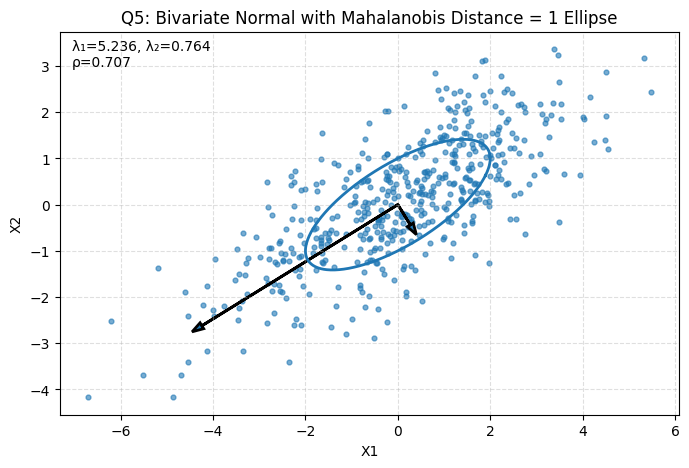

In [10]:

np.random.seed(623)

# ---------- Helpers (clean & short) ----------
def center(X: np.ndarray) -> np.ndarray:
    return X - X.mean(axis=0, keepdims=True)

def cov_sample(X: np.ndarray) -> np.ndarray:
    n = X.shape[0]
    Xc = center(X)
    return (Xc.T @ Xc) / (n - 1)

def ellipse_md1_points(mu: np.ndarray, Sigma: np.ndarray, num: int = 400) -> np.ndarray:
    """
    Mahalanobis level set {(x-μ)^T Σ^{-1} (x-μ) = 1}.
    Using spectral form: x(θ) = μ + P Λ^{1/2} u(θ),  ||u||=1.
    """
    vals, vecs = np.linalg.eigh(Sigma)              # Σ = P Λ P^T, vals ascending
    order = np.argsort(vals)[::-1]                  # sort descending for consistency
    vals, vecs = vals[order], vecs[:, order]
    theta = np.linspace(0, 2*np.pi, num)
    U = np.vstack([np.cos(theta), np.sin(theta)])   # 2×num
    Sigma_sqrt = vecs @ np.diag(np.sqrt(vals)) @ vecs.T
    E = mu.reshape(-1, 1) + Sigma_sqrt @ U          # 2×num
    return E, vals, vecs

# ---------- Parameters ----------
mu = np.array([0.0, 0.0])
Sigma = np.array([[4.0, 2.0],
                  [2.0, 2.0]])
n = 500

# ---------- Simulate ----------
X = np.random.multivariate_normal(mean=mu, cov=Sigma, size=n)
df = pd.DataFrame(X, columns=["X1", "X2"])

# ---------- Ellipse + eigen-system ----------
E, eigvals, eigvecs = ellipse_md1_points(mu, Sigma, num=400)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(7, 6))

# 1) Scatter
ax.scatter(df["X1"], df["X2"], s=12, alpha=0.6)

# 2) MD = 1 ellipse
ax.plot(E[0, :], E[1, :], linewidth=2)

# 3) Eigenvectors of Σ — unit directions scaled by λ_i (per assignment directive)
origin = mu
for lam, v in zip(eigvals, eigvecs.T):
    tip = origin + lam * v
    ax.arrow(origin[0], origin[1], tip[0]-origin[0], tip[1]-origin[1],
             length_includes_head=True, head_width=0.15, head_length=0.25, linewidth=2)

# Annotations
rho = Sigma[0, 1] / np.sqrt(Sigma[0, 0] * Sigma[1, 1])
ax.text(0.02, 0.98, f"λ₁={eigvals[0]:.3f}, λ₂={eigvals[1]:.3f}\nρ={rho:.3f}",
        transform=ax.transAxes, ha="left", va="top")

ax.set_title("Bivariate Normal with Mahalanobis Distance = 1 Ellipse")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_aspect("equal", adjustable="box")
ax.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

# ---------- Save outputs ----------
OUT = Path("outputs/q5"); OUT.mkdir(parents=True, exist_ok=True)
fig_path = OUT / "Q5_scatter_md1_ellipse_eigenvectors.png"
csv_path = OUT / "Q5_simulated_data.csv"
plt.savefig(fig_path, dpi=200, bbox_inches="tight")
df.to_csv(csv_path, index=False)

# ---------- Diagnostics (printed) ----------
display(Markdown(
    f"""
**Eigenvalues (desc):** {np.array2string(eigvals, precision=6)}  
**Eigenvectors (columns correspond to eigenvalues):**  
{np.array2string(eigvecs, precision=6)}  

"""
))

# ---------- Optional confirmation ----------
# Reconstruct Σ from spectral pieces to confirm
Sigma_recon = eigvecs @ np.diag(eigvals) @ eigvecs.T
print("‖Σ - PΛPᵀ‖_F =", np.linalg.norm(Sigma - Sigma_recon, ord="fro"))


### Q5 - Insight

* **Shape & orientation ⇒ variable relationship**

  * The MD=1 contour is an **ellipse** whose **major/minor axes** are the eigenvectors of $\Sigma$; the **semi-axis lengths** are $\sqrt{\lambda_1}, \sqrt{\lambda_2}$.
  * A **tilt up-right** (first eigenvector with positive slope) indicates **positive correlation** between $X_1$ and $X_2$; tilt down-right would indicate negative correlation.
  * **Elongation** (axis ratio $\sqrt{\lambda_1/\lambda_2}$) measures strength of linear association/variance anisotropy: the more stretched, the stronger the linear relationship.
  * For $ \Sigma=\begin{bmatrix}4&2\\2&2\end{bmatrix}$: $ \rho=2/\sqrt{4\cdot2}\approx0.707$, $ \lambda_1\approx5.236,\ \lambda_2\approx0.764$ → ellipse is strongly elongated along the first eigenvector (clear positive co-movement).

* **Why Mahalanobis distance gives ellipses (not circles)**

  * Mahalanobis distance is the quadratic form

    $$
    d_M^2(x)=(x-\mu)^\top \Sigma^{-1}(x-\mu).
    $$

    Level sets $d_M^2(x)=c^2$ are **ellipses** because, with $\Sigma=P\Lambda P^\top$, any point on the contour can be written as

    $$
    x=\mu + P\,\Lambda^{1/2}\,u,\quad \|u\|=c,
    $$

    i.e., an **affine transform of a circle** (scale by $\Lambda^{1/2}$, then rotate by $P$).
  * Only when $\Sigma=\sigma^2 I$ (equal variance, no correlation) do these contours reduce to **circles**.


# Question 6

Visual EDA
- Marginal histograms for all numeric variables
- Scatterplot matrix with KDE contours
- One joint plot (scatter + density + marginals)
- Auto insights on multicollinearity/clustering"

**Variables (p=7)**: Wind, Solar Rad, CO, NO, NO2, O3, HC  
**n (after listwise drop)**: 42

**Joint-plot pair:** `CO` vs `NO2`

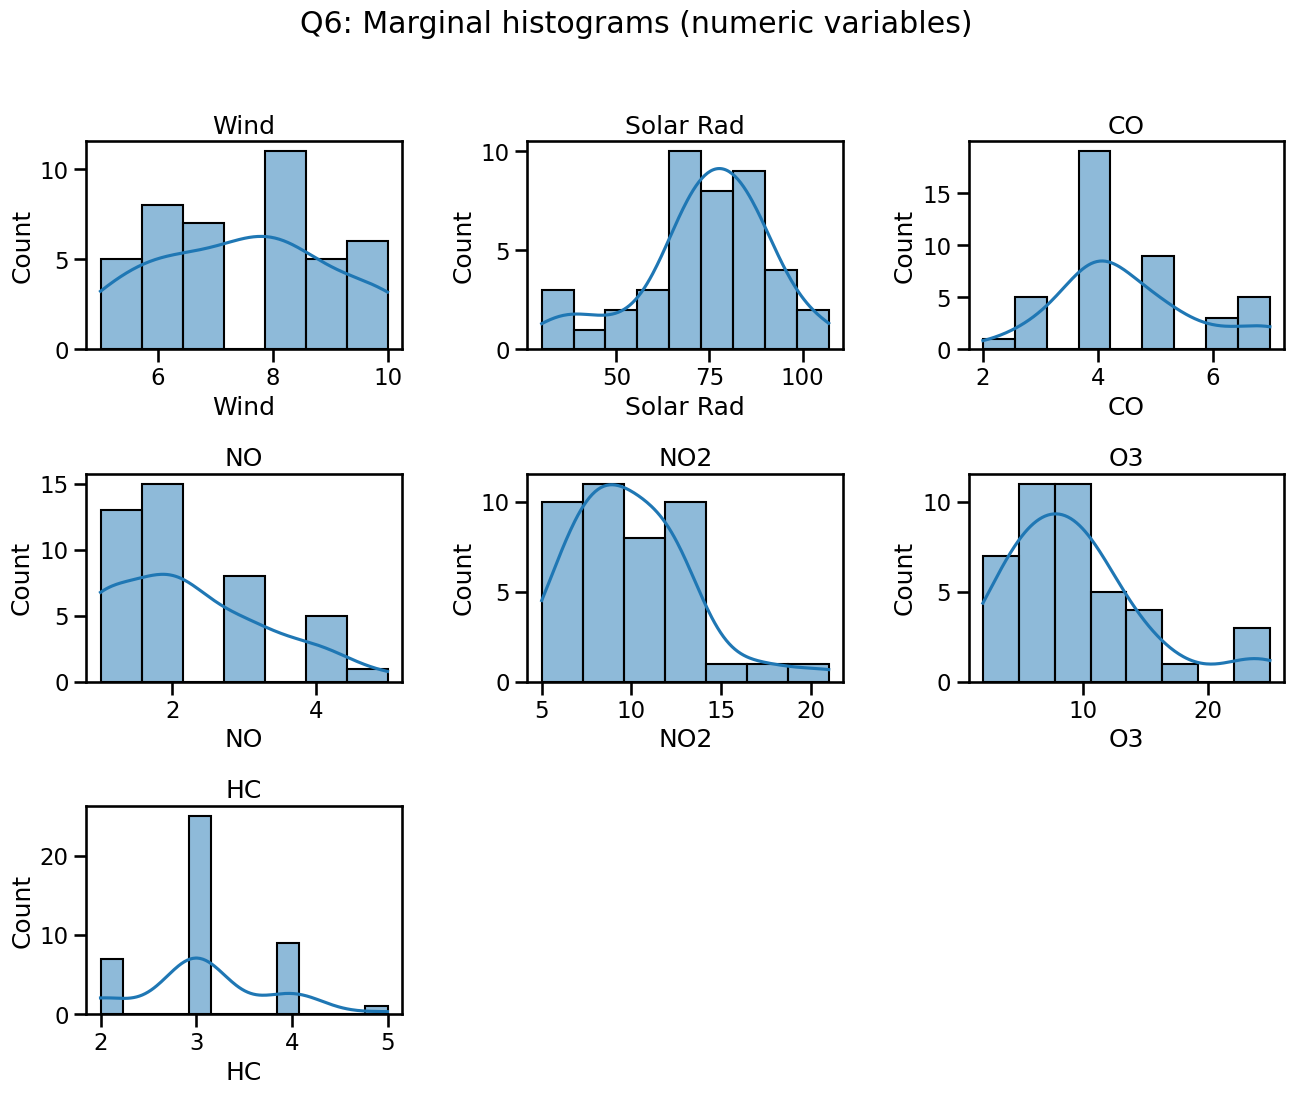

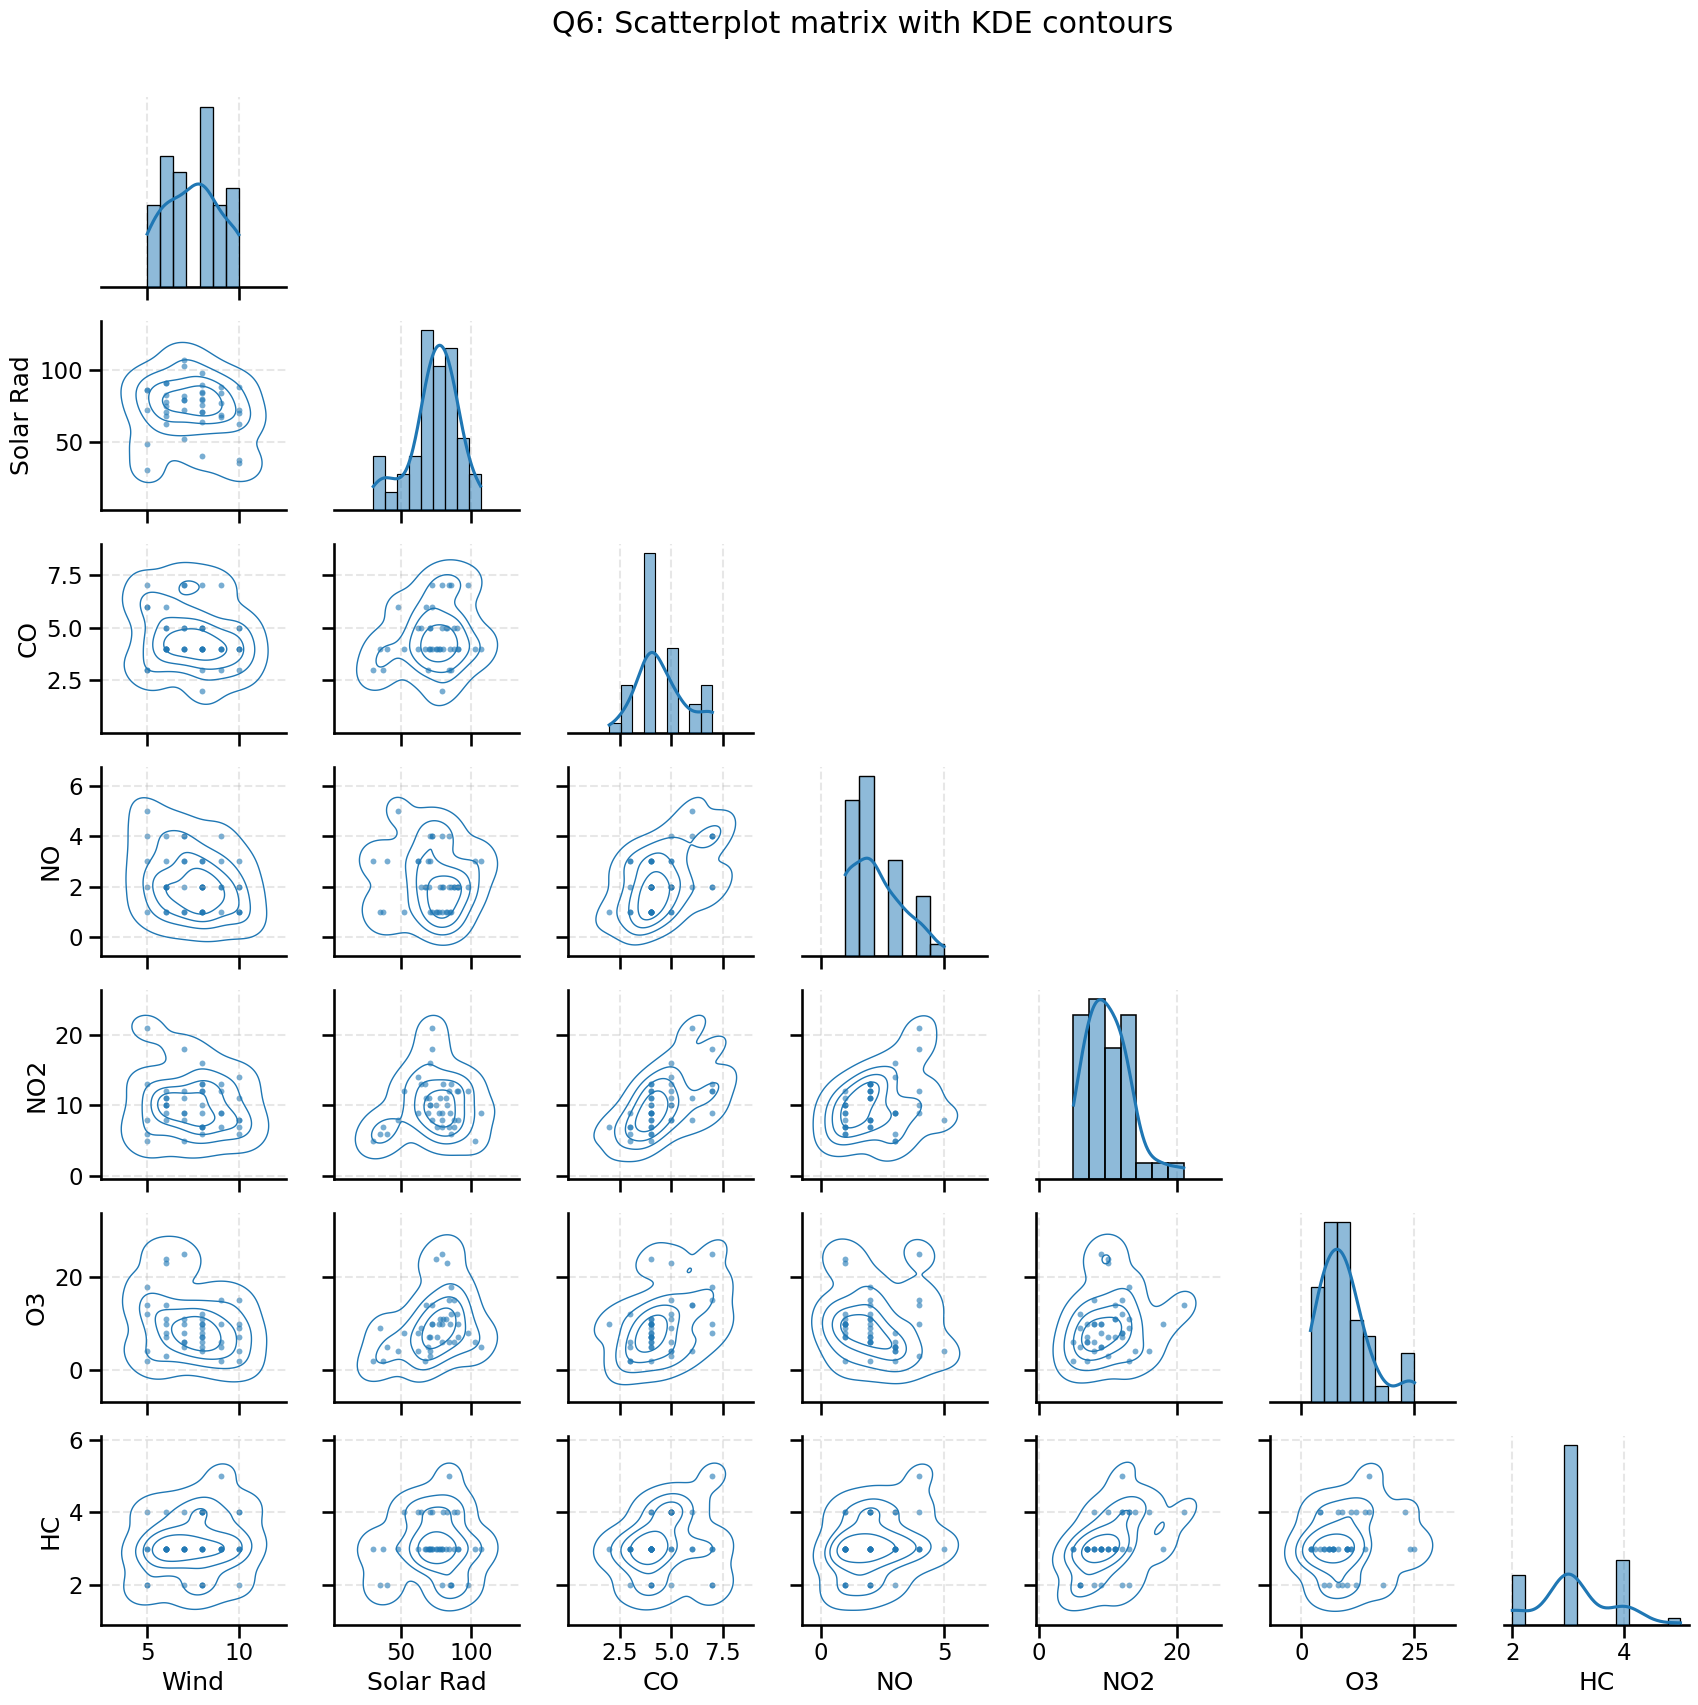

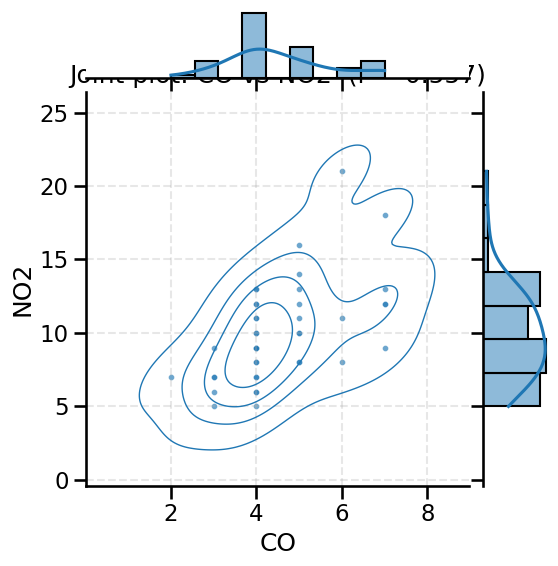

In [12]:
# ----------------------------
# Setup
# ----------------------------
np.random.seed(623)
sns.set_context("talk")
OUT = Path("outputs/q6")
(OUT / "figures").mkdir(parents=True, exist_ok=True)
(OUT / "tables").mkdir(parents=True, exist_ok=True)

# ----------------------------
# Load & select variables
# ----------------------------
df = pd.read_csv("airpol.csv")
num = df.select_dtypes(include=[np.number]).copy()
num = num.apply(pd.to_numeric, errors="coerce").astype(float)  # ensure numeric floats
num = num.dropna(axis=0)  # listwise for plotting

cols = num.columns.tolist()
p = len(cols)
display(Markdown(f"**Variables (p={p})**: {', '.join(cols)}  \n**n (after listwise drop)**: {len(num)}"))

# Correlation & pair (for the joint plot)
R = num.corr()
R.to_csv(OUT / "tables" / "Q6_correlation.csv", index=True)
if p >= 2:
    abs_R = R.abs().where(~np.eye(p, dtype=bool))
    i, j = np.unravel_index(np.nanargmax(abs_R.values), abs_R.shape)
    pair = (cols[i], cols[j])
else:
    pair = (cols[0], cols[0])
display(Markdown(f"**Joint-plot pair:** `{pair[0]}` vs `{pair[1]}`"))

# ----------------------------
# 1) Marginal histograms (uniform styling)
# ----------------------------
ncols = min(3, p) if p > 1 else 1
nrows = int(np.ceil(p / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4.5*ncols, 3.6*nrows))
axes = np.array(axes).reshape(-1)

for k, col in enumerate(cols):
    ax = axes[k]
    sns.histplot(num[col], bins='auto', kde=True, ax=ax)
    ax.set_title(col)
for k in range(p, len(axes)):
    axes[k].axis("off")

fig.suptitle("Q6: Marginal histograms (numeric variables)", y=1.02)
plt.tight_layout()
path_hist = OUT / "figures" / "Q6_histograms.png"
plt.savefig(path_hist, dpi=200, bbox_inches="tight")
plt.show()

# ----------------------------
# 2) Scatterplot matrix with KDE contours
# ----------------------------
g = sns.PairGrid(num, corner=True, diag_sharey=False)
g.map_lower(sns.scatterplot, s=18, alpha=0.6, linewidth=0)
g.map_lower(sns.kdeplot, levels=5, linewidths=1, fill=False, thresh=0.05)  # overlay contours
g.map_diag(sns.histplot, kde=True)
for ax in g.axes.flat:
    if ax is not None:
        ax.grid(True, linestyle="--", alpha=0.3)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Q6: Scatterplot matrix with KDE contours")
path_sp = OUT / "figures" / "Q6_spmatrix_kde.png"
g.fig.savefig(path_sp, dpi=200, bbox_inches="tight")
plt.show()

# ----------------------------
# 3) Joint plot (scatter + density + marginals) for the selected pair
# ----------------------------
xv, yv = pair
J = sns.JointGrid(data=num, x=xv, y=yv, height=6)

# Joint: scatter + KDE contours
J.plot_joint(sns.scatterplot, s=18, alpha=0.65)
J.plot_joint(sns.kdeplot, levels=5, linewidths=1, fill=False, thresh=0.05)

# Marginals — bind explicitly to x= / y= to avoid dtype issues
sns.histplot(x=num[xv].astype(float), bins='auto', kde=True, ax=J.ax_marg_x)
sns.histplot(y=num[yv].astype(float), bins='auto', kde=True, ax=J.ax_marg_y)

r = R.loc[xv, yv]
J.ax_joint.set_title(f"Joint plot: {xv} vs {yv}  (r = {r:.3f})")
J.ax_joint.grid(True, linestyle="--", alpha=0.3)

path_joint = OUT / "figures" / f"Q6_joint_{xv}_vs_{yv}.png"
J.fig.savefig(path_joint, dpi=200, bbox_inches="tight")
plt.show()


### Q6 - Insight

**Multicollinearity?**

* No severe red flags: max $|r|$ ≈ **0.56** (CO–NO₂), then **0.50** (CO–NO), **0.45** (NO₂–HC), **0.41** (CO–O₃), **0.32** (Solar Rad–O₃). None near the **0.8** danger zone.
* Visuals match: SPLOM shows **moderately tilted bands** among the pollutant block {CO, NO, NO₂, HC}; Wind is **negatively** associated with several pollutants (dispersion effect).
* Conclusion: **moderate collinearity within pollutants**, not “hard” multicollinearity.

**Clustering?**

* Histograms mostly **unimodal** (some skew/heavy tails); KDE contours are single-elliptical with **no cleanly separated clouds**.
* HC shows slight binning/peaks, but nothing that looks like a distinct sub-population at this sample size.
* Conclusion: **no clear clustering**; at most faint subgroup hints.

**How this affects variable selection**

* Keep the pollutant signals but **watch VIFs** if you put CO, NO, NO₂, HC in the same regression; be ready to:

  * drop one representative from the correlated set (e.g., prefer **NO₂** or **CO** based on domain/target), or
  * use **PCA** (pollutant factor) or **ridge**/**lasso** to stabilize coefficients.
* For ozone modeling, **Solar Rad** and **Wind** are useful (Solar Rad–O₃ positive; Wind tends to lower pollutants).
* Revisit after scaling and diagnostics: if any pair hits $|r|\ge 0.8$ or VIF > 5, **reduce/regularize** accordingly.
